In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # plt scheme을 seaborn으로 세팅
sns.set(font_scale=2.5)  # 폰트 스케일 키우기


# NULL 값 관찰을 도와주는 라이브러리
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submit = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<center style='background:yellow; font-size:25pt;'>NaN 값 확인하기</center>

In [9]:
for col in train.columns:
    print('column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(train[col].isnull().sum()/train.shape[0])))

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [15]:
for col in test.columns:
    print('column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(test[col].isnull().sum()/test.shape[0])))

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot: >

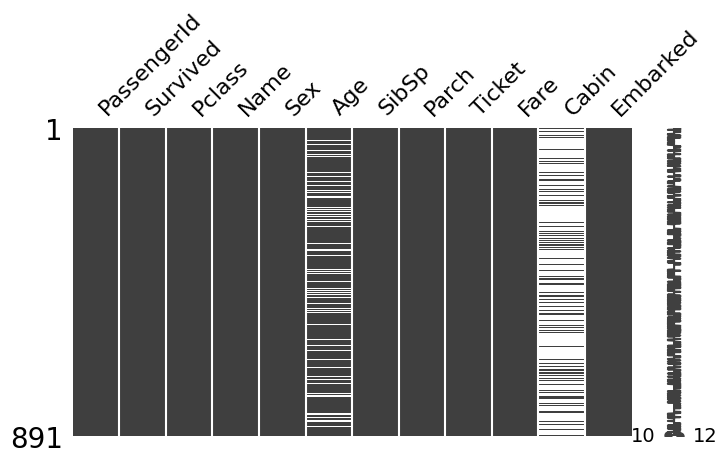

In [16]:
# 결측치 확인 도와주는 라이브러리 사용
msno.matrix(train.iloc[:,:],figsize=(8,4))

<AxesSubplot: >

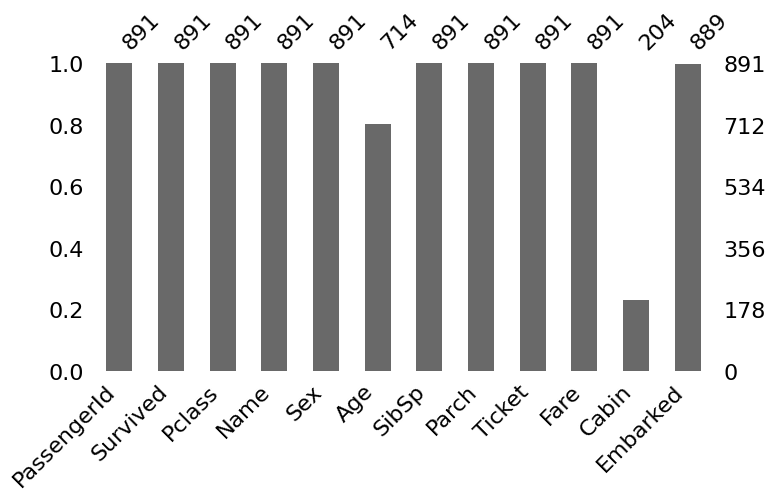

In [17]:
msno.bar(train.iloc[:,:],figsize=(8,4))

<AxesSubplot: >

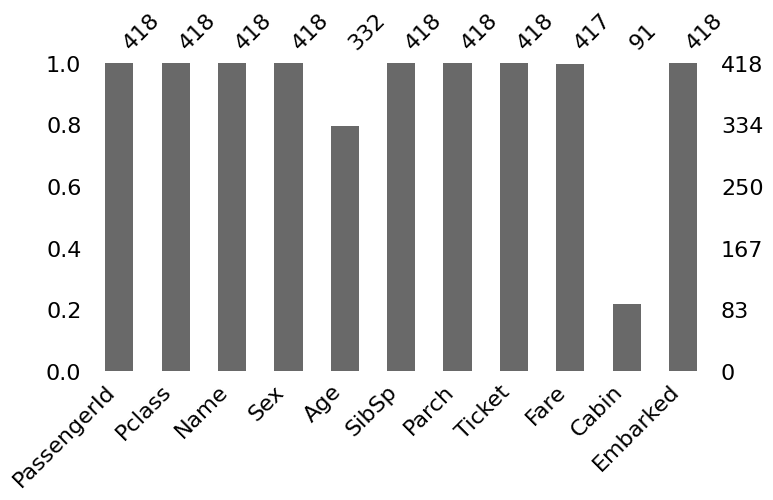

In [18]:
msno.bar(test.iloc[:,:],figsize=(8,4))

<center style='background:yellow; font-size:25pt;'>Target Label 확인하기</center>

In [23]:
print('생존 인원 수: {:}'.format(train['Survived'].sum()))
print('전체 인원 수: {:}'.format(train.shape[0]))
print('생존률:\t{:.4f}%'.format(train['Survived'].sum()/train.shape[0]*100))

생존 인원 수: 342
전체 인원 수: 891
생존률:	38.3838%


In [27]:
train['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

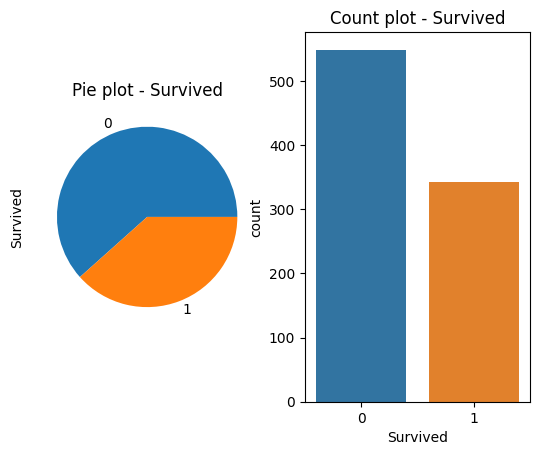

In [28]:
f, ax = plt.subplots(1,2)

train['Survived'].value_counts().plot.pie(ax = ax[0])
ax[0].set_title('Pie plot - Survived')
#ax[0].set_ylabel('')

sns.countplot(x='Survived', data= train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

<center style='background:yellow; font-size:25pt;'>EDA</center>

<p style='background:green; color:white; font-size:15pt;'> 1.1 P class</p>

In [33]:
train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [34]:
train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [35]:
pd.crosstab(train['Pclass'], train['Survived'],margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

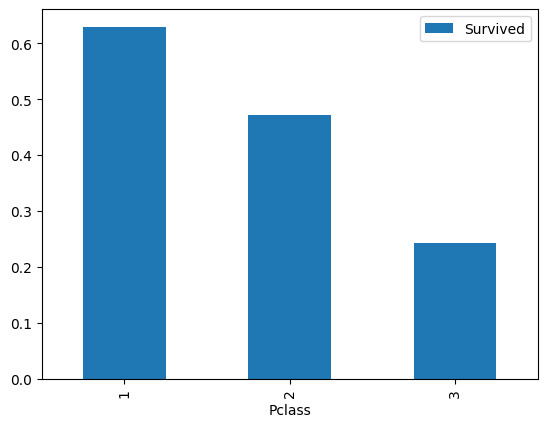

In [36]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False).plot.bar()

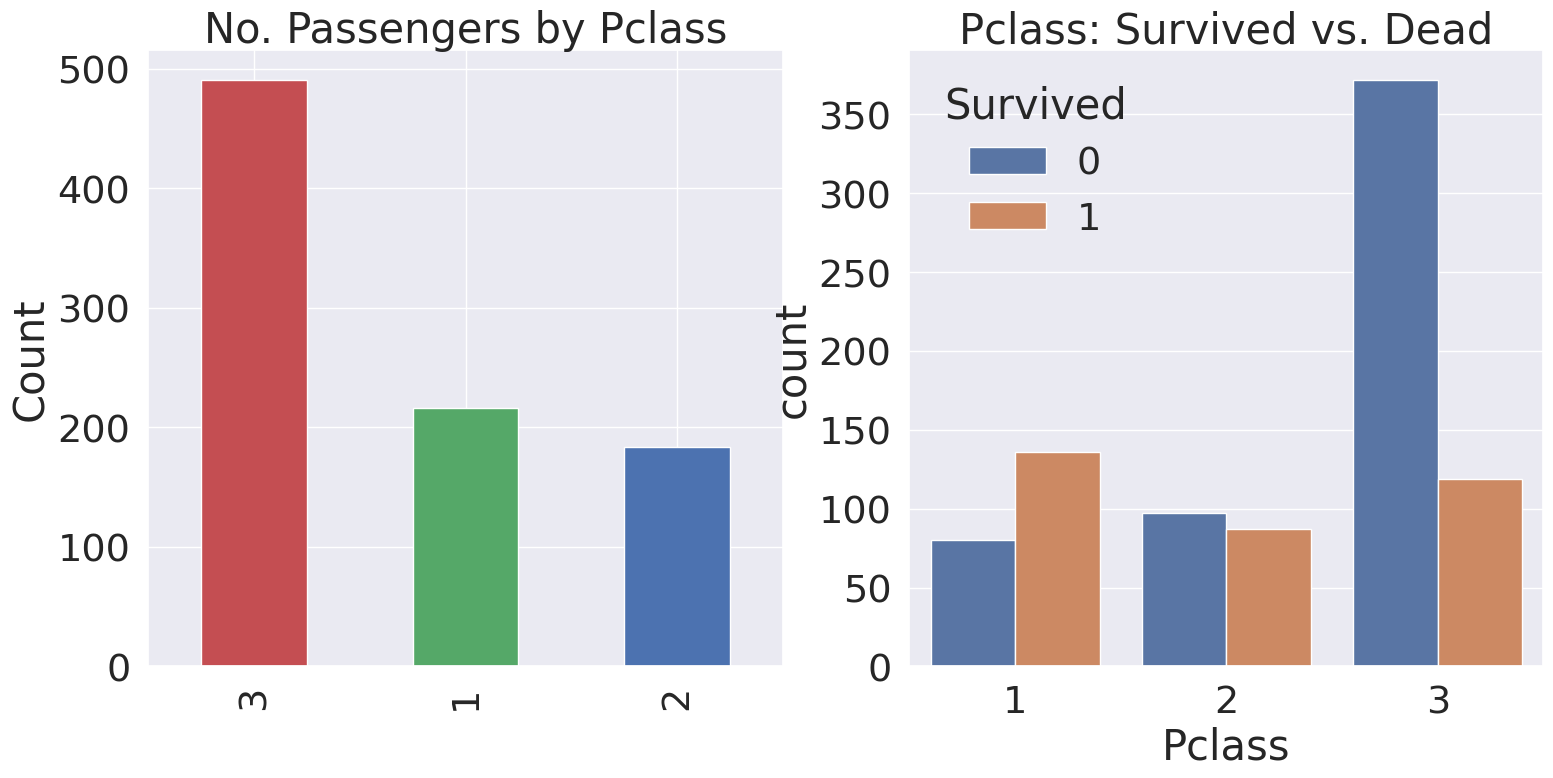

In [43]:
f, ax = plt.subplots(1,2,figsize=(18,8))

train['Pclass'].value_counts().plot.bar(ax=ax[0],color=['r','g','b'])
ax[0].set_title('No. Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')

plt.show()

<p style='background:green; color:white; font-size:15pt;'> 1.2 P class</p>

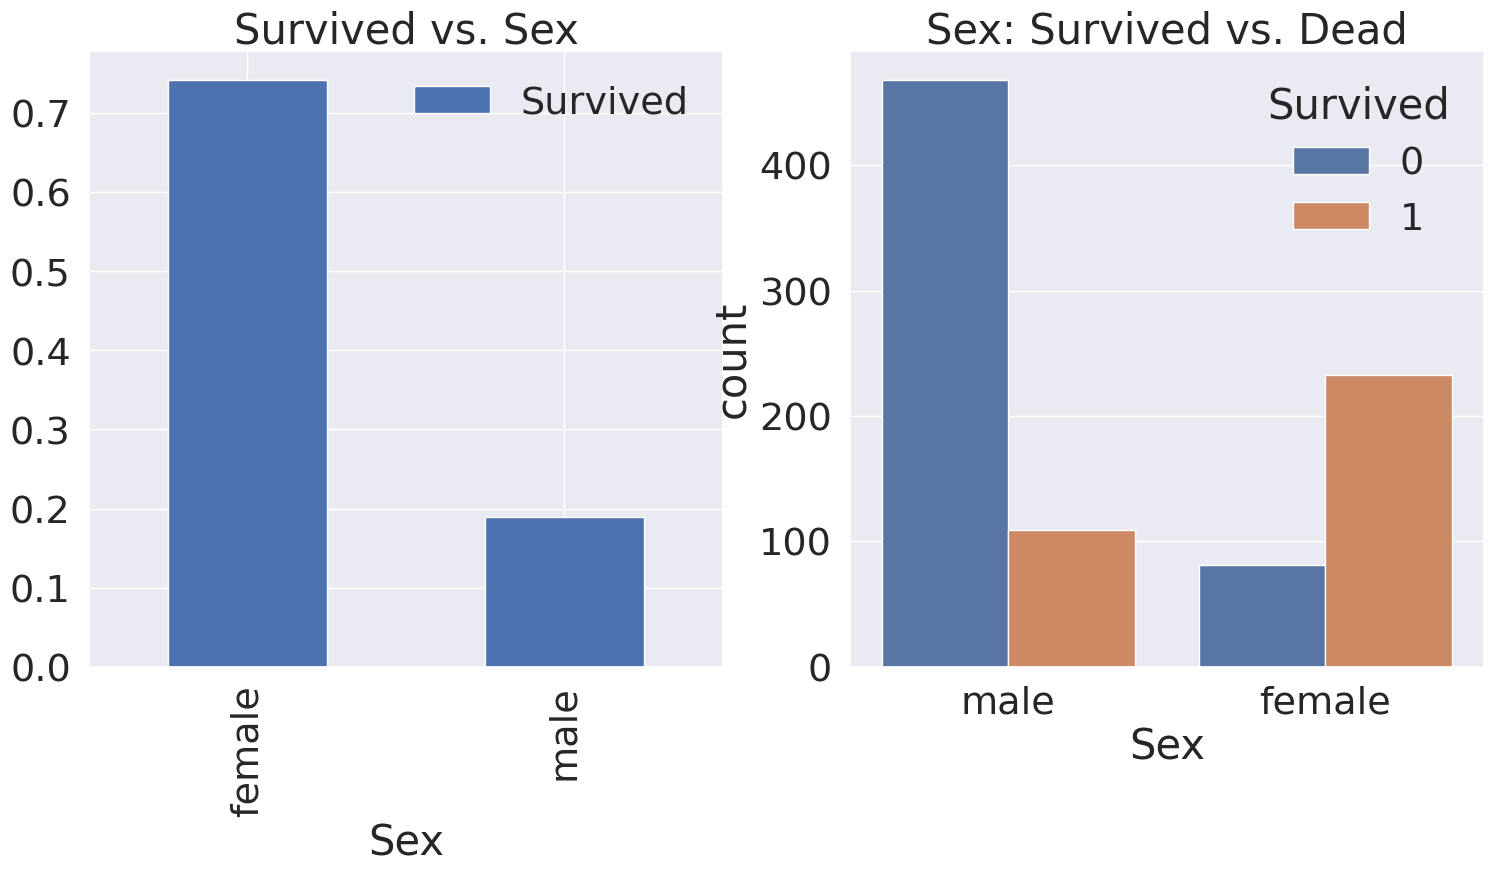

In [46]:
f, ax = plt.subplots(1,2,figsize=(18,8))

train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot(x='Sex',hue='Survived',data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

In [47]:
pd.crosstab(train['Sex'],train['Survived'],margins=True).style.background_gradient()

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<p style='background:green; color:white; font-size:15pt;'> 1.3 Sex&Pclass</p>

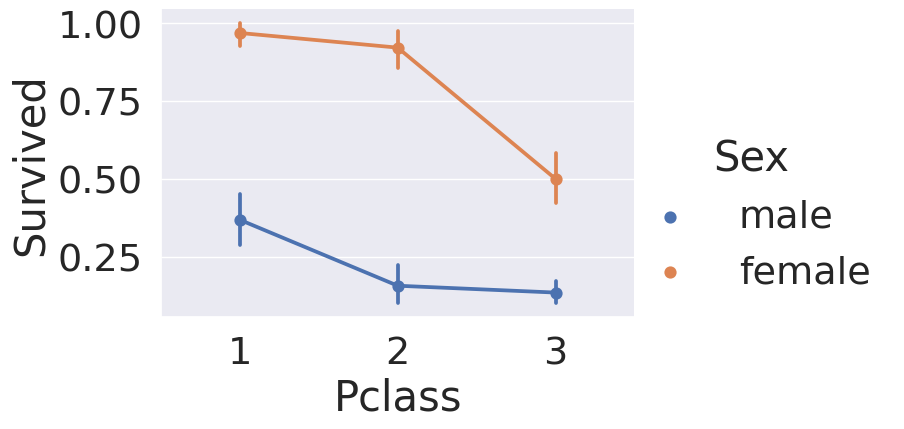

In [48]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=train,aspect=1.5)

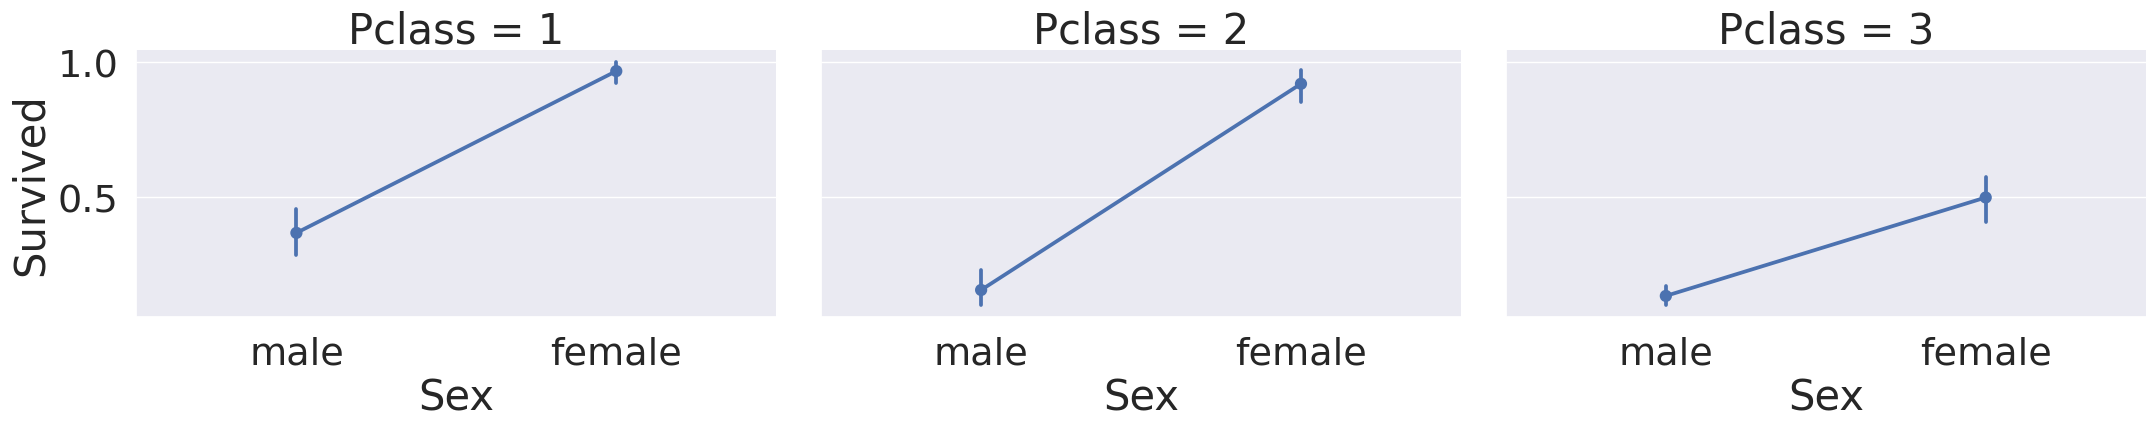

In [51]:
sns.catplot(x='Sex',y='Survived',col='Pclass',kind='point',data=train,aspect=1.5)

<p style='background:green; color:white; font-size:15pt;'> 1.4 Age</p>

In [52]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

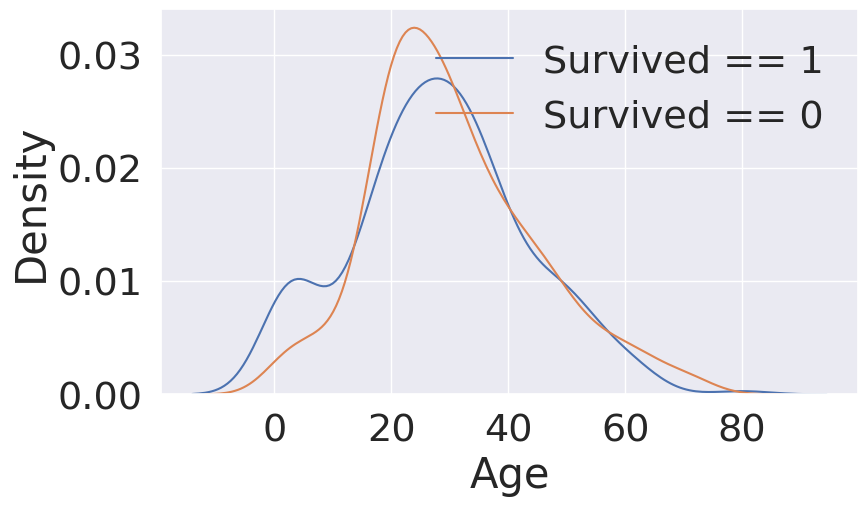

In [53]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.kdeplot(train[train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1','Survived == 0'])

plt.show()

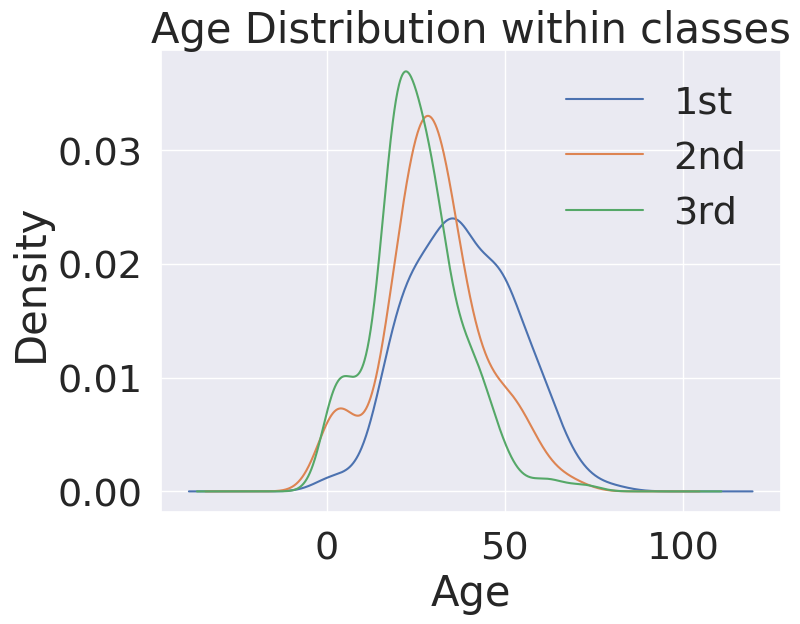

In [54]:
plt.figure(figsize=(8,6))

train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')


plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st','2nd','3rd'])

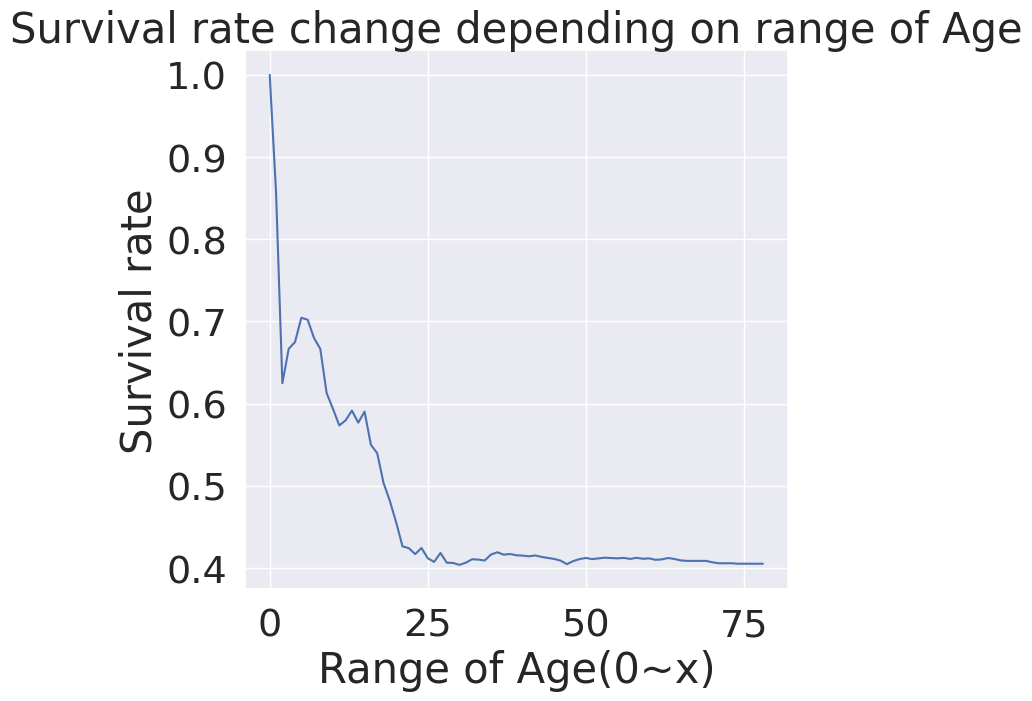

In [55]:
cummulate_survival_ratio = []

for i in range(1,80):
    cummulate_survival_ratio.append(train[train['Age']<i]['Survived'].sum()/len(train[train['Age']<i]['Survived']))

plt.figure(figsize =  (7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

plt.show()

<p style='background:green; color:white; font-size:15pt;'> 1.5 Pclass&Sex&Age</p>

In [61]:
import matplotlib.pyplot as plt


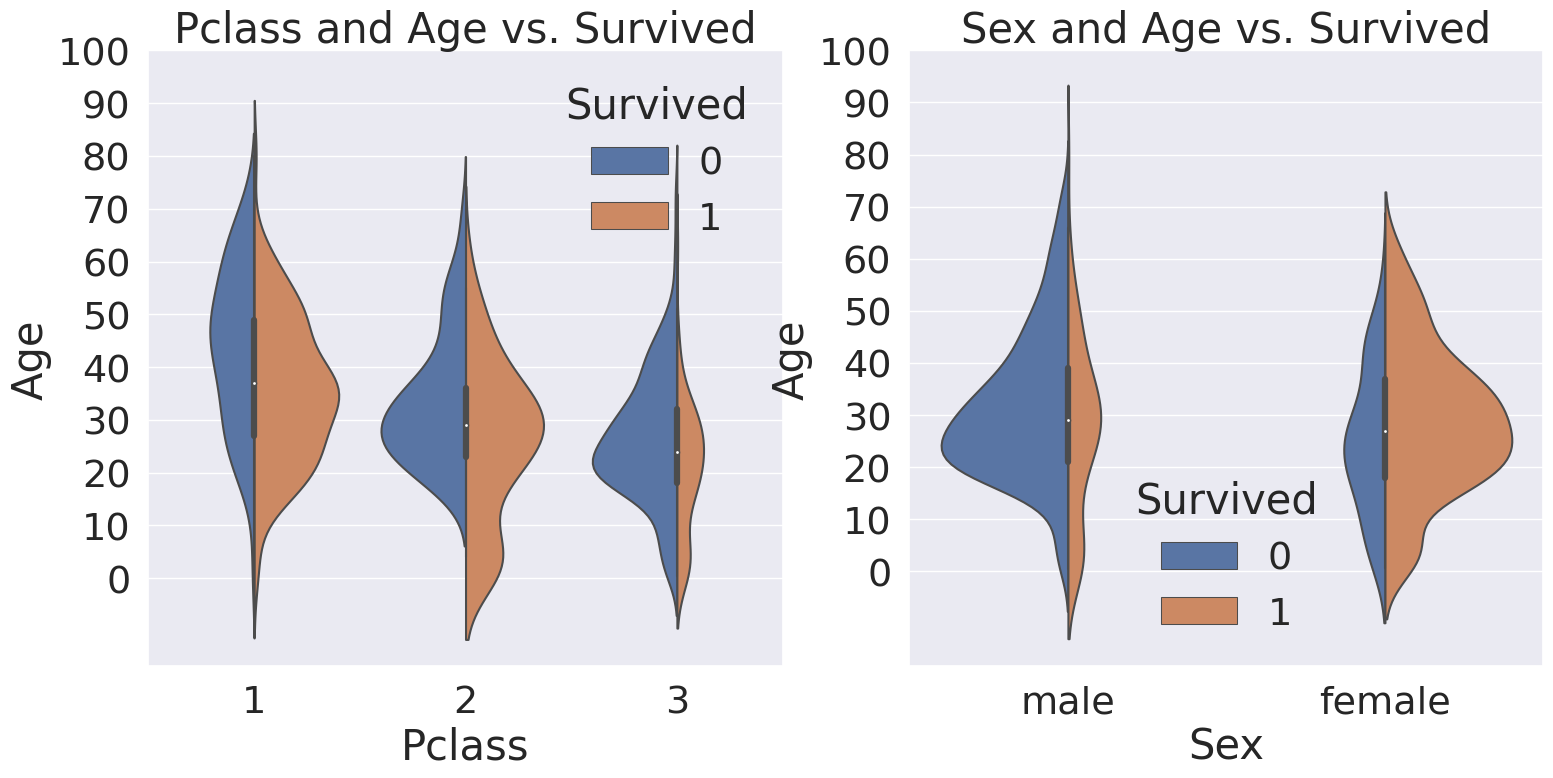

In [62]:
f, ax = plt.subplots(1,2, figsize = (18,8))

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train, scale = 'count', split = True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()